In [2]:
#load all pickle files from /runs folder

import pickle
import os
import numpy as np
import imageio

#load all pickle files from /runs folder
def load_all_pickle_files(path):
    #get all pickle files from /runs folder
    pickle_files = []
    for file in os.listdir('/home/peter/LearningJointLimits/3D_manipulator/'+str(path)):
        if file.endswith('.pkl'):
            pickle_files.append(file)
    #load all pickle files
    #sort by file name
    pickle_files.sort(key = lambda x:x[-5])
    print(pickle_files)
    data = []
    for file in pickle_files:
        with open('/home/peter/LearningJointLimits/3D_manipulator/'+ str(path) + file, 'rb') as f:
            data.append(pickle.load(f))
    return data

In [3]:
#matplotlib settings

from matplotlib import pyplot as plt
import scienceplots
plt.style.reload_library()
plt.style.use('science')
plt.rcParams.update({'figure.dpi': '600'})

['run_data_test_1706701698.2118795_test_trajectories_1.pkl', 'run_data_test_1706701562.1749165_test_trajectories_1.pkl', 'run_data_test_1706704230.481037_test_trajectories_1.pkl', 'run_data_test_1706704502.9537814_test_trajectories_1.pkl', 'run_data_test_1706702106.1961286_test_trajectories_1.pkl', 'run_data_test_1706704092.7644641_test_trajectories_1.pkl', 'run_data_test_1706701426.6866503_test_trajectories_1.pkl', 'run_data_test_1706700901.761938_test_trajectories_1.pkl', 'run_data_test_1706701023.7998867_test_trajectories_1.pkl', 'run_data_test_1706701833.0975888_test_trajectories_1.pkl', 'run_data_test_1706700779.4746652_test_trajectories_1.pkl', 'run_data_test_1706702375.1114712_test_trajectories_1.pkl', 'run_data_test_1706703154.9858866_test_trajectories_1.pkl', 'run_data_test_1706700644.0552166_test_trajectories_1.pkl', 'run_data_test_1706704366.3405325_test_trajectories_1.pkl', 'run_data_test_1706702891.858021_test_trajectories_1.pkl', 'run_data_test_1706701968.591051_test_traj

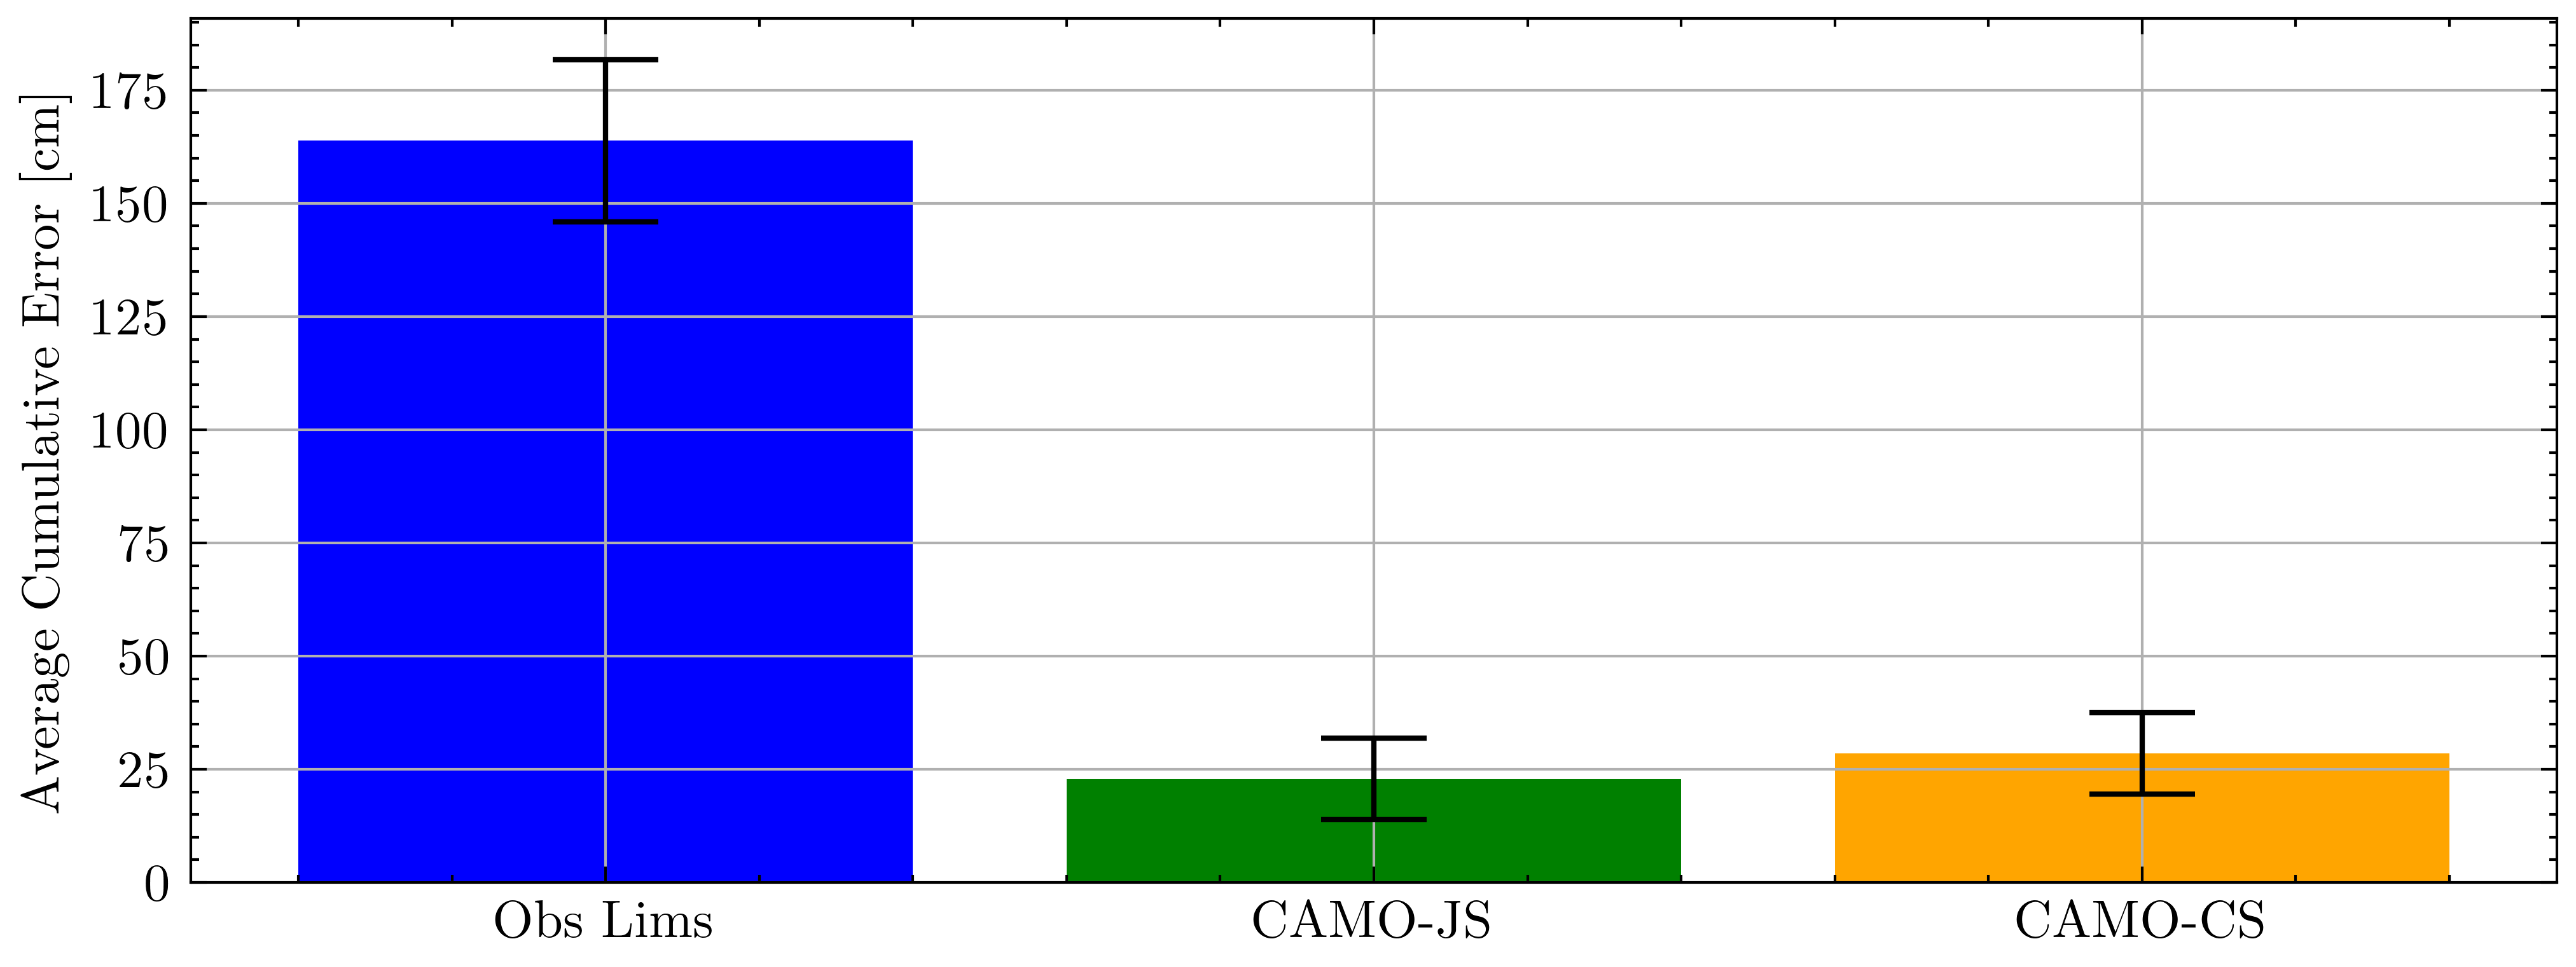

In [5]:
test_data = load_all_pickle_files('plotting_runs_3D/inference/')
print(len(test_data))
print(len(test_data[0]))
ml_losses = []
obs_losses = []
fixed_losses = []
cartesian_losses = []
#cumsum loss after 50 tasks for each run and get mean and std
for test in test_data:
    ml_loss = []
    obs_loss = []
    fixed_loss = []
    cartesian_loss = []
    for i in range(len(test_data[0])):
        ml_loss.append(np.sum(test[i]["c_mlc_loss"]))
        obs_loss.append(np.sum(test[i]["c_obs_loss"]))
        fixed_loss.append(np.sum(test[i]["c_fixed_loss"]))
        cartesian_loss.append(np.sum(test[i]["c_cartesian_loss"]))

    ml_losses.append(np.sum(ml_loss))
    obs_losses.append(np.sum(obs_loss))
    fixed_losses.append(np.sum(fixed_loss))
    cartesian_losses.append(np.sum(cartesian_loss))

mean_ml_loss = np.mean(ml_losses)
mean_obs_loss = np.mean(obs_losses)
mean_fixed_loss = np.mean(fixed_losses)
mean_cartesian_loss = np.mean(cartesian_losses)

std_ml_loss = 1.96*np.std(ml_losses)/np.sqrt(len(ml_losses))
std_obs_loss = 1.96*np.std(obs_losses)/np.sqrt(len(obs_losses))
std_fixed_loss = 1.96*np.std(fixed_losses)/np.sqrt(len(fixed_losses))
std_cartesian_loss = 1.96*np.std(cartesian_losses)/np.sqrt(len(cartesian_losses))

#plot losses with a bar chart with error bars
plt.figure(figsize=(8,3))
plt.ylabel('Average Cumulative Error [cm]')
plt.bar(['Obs Lims', 'CAMO-JS', 'CAMO-CS'], [mean_obs_loss, mean_ml_loss, mean_cartesian_loss], yerr=[std_obs_loss, std_ml_loss, std_cartesian_loss], capsize=10, color=['blue', 'green', 'orange'])
plt.grid(True)
plt.show()

['run_data_test_1706748244.1356423_test_trajectories_1_iterations.pkl', 'run_data_test_1706746920.3358784_test_trajectories_1_iterations.pkl', 'run_data_test_1706746621.7466354_test_trajectories_1_iterations.pkl', 'run_data_test_1706747218.2043254_test_trajectories_1_iterations.pkl', 'run_data_test_1706746172.868919_test_trajectories_1_iterations.pkl', 'run_data_test_1706747797.1442163_test_trajectories_1_iterations.pkl', 'run_data_test_1706745888.693103_test_trajectories_1_iterations.pkl', 'run_data_test_1706745140.7655976_test_trajectories_1_iterations.pkl', 'run_data_test_1706747368.0870733_test_trajectories_1_iterations.pkl', 'run_data_test_1706747945.2031336_test_trajectories_1_iterations.pkl', 'run_data_test_1706748963.0544527_test_trajectories_1_iterations.pkl', 'run_data_test_1706748391.4145384_test_trajectories_1_iterations.pkl', 'run_data_test_1706745439.8794963_test_trajectories_1_iterations.pkl', 'run_data_test_1706744691.2820225_test_trajectories_1_iterations.pkl', 'run_da

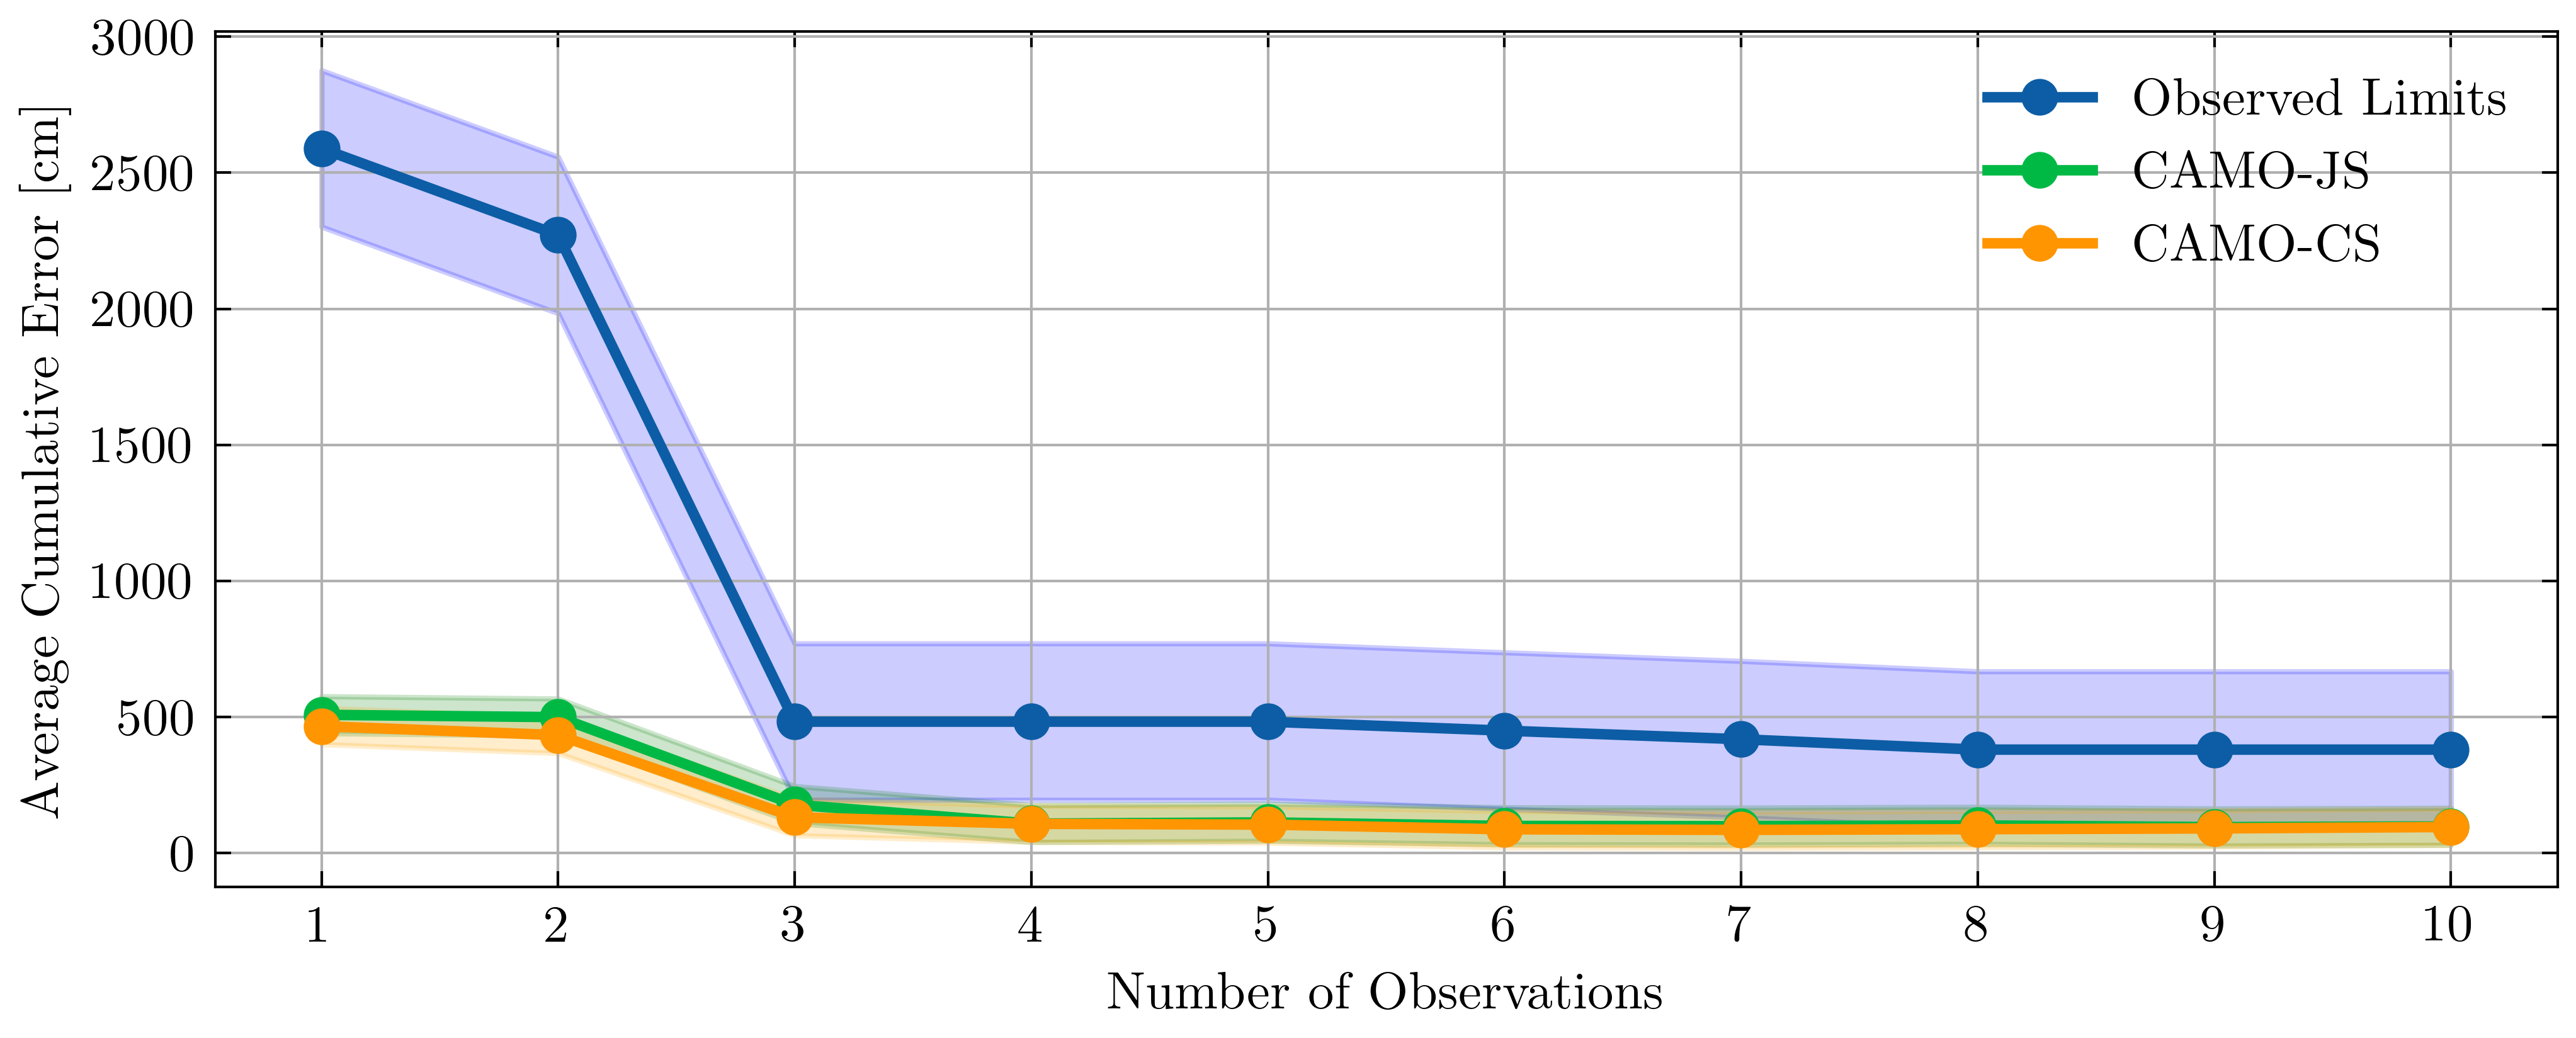

In [6]:
learning_test_data = load_all_pickle_files('plotting_runs_3D/learning/')
print(len(learning_test_data))
print(len(learning_test_data[0]))
print(learning_test_data[0]['0'][0].keys())
ml_losses = []
obs_losses = []
fixed_losses = []
cartesian_losses = []
#for every run, there are 10 obsevations, and we want to compute a loss across the 20 unseen goals for each observation

#At the end, I want a list of 10 losses, 1 for each observation, for each run
for run in learning_test_data:
    ml_loss = []
    obs_loss = []
    fixed_loss = []
    cartesian_loss = []
    for num_obs in range(len(run)):
        mll = []
        obsl = []
        fixedl = []
        cartesianl = []
        for g in range(len(run[str(num_obs)])):
            mll.append((run[str(num_obs)][g]["c_mlc_loss"]))
            obsl.append((run[str(num_obs)][g]["c_obs_loss"]))
            fixedl.append((run[str(num_obs)][g]["c_fixed_loss"]))
            cartesianl.append((run[str(num_obs)][g]["c_cartesian_loss"]))
        ml_loss.append(np.sum(mll))
        obs_loss.append(np.sum(obsl))
        fixed_loss.append(np.sum(fixedl))
        cartesian_loss.append(np.sum(cartesianl))

    ml_losses.append(ml_loss)
    obs_losses.append(obs_loss)
    fixed_losses.append(fixed_loss)
    cartesian_losses.append(cartesian_loss)

mean_ml_loss = np.mean(ml_losses, axis=0)
mean_obs_loss = np.mean(obs_losses, axis=0)
mean_fixed_loss = np.mean(fixed_losses, axis=0)
mean_cartesian_loss = np.mean(cartesian_losses, axis=0)

std_ml_loss = 1.96*np.std(ml_losses)/np.sqrt(len(ml_losses))
std_obs_loss = 1.96*np.std(obs_losses)/np.sqrt(len(obs_losses))
std_fixed_loss = 1.96*np.std(fixed_losses)/np.sqrt(len(fixed_losses))
std_cartesian_loss = 1.96*np.std(cartesian_losses)/np.sqrt(len(cartesian_losses))

#range from 1 to 10
range_obs = np.arange(1, 11, 1)

#plot losses with a bar chart with error bars
plt.figure(figsize=(8,3))
plt.ylabel('Average Cumulative Error [cm]')
plt.xlabel('Number of Observations')
#add points for each observation
plt.plot(range_obs, mean_obs_loss, label='Observed Limits', linewidth=2, marker='o')
plt.plot(range_obs, mean_ml_loss, label='CAMO-JS', linewidth=2, marker='o')
plt.plot(range_obs, mean_cartesian_loss, label='CAMO-CS', linewidth=2, marker='o')
plt.fill_between(range_obs, mean_obs_loss-std_obs_loss, mean_obs_loss+std_obs_loss, alpha=0.2, color='blue')
plt.fill_between(range_obs, mean_ml_loss-std_ml_loss, mean_ml_loss+std_ml_loss, alpha=0.2, color='green')
plt.fill_between(range_obs, mean_cartesian_loss-std_cartesian_loss, mean_cartesian_loss+std_cartesian_loss, alpha=0.2, color='orange')
#put legend below plot
plt.legend(loc='upper right', fancybox=False, shadow=False, ncol=1)
plt.xticks(range_obs)
#grid only on major ticks
plt.grid(True, which='major')
#remove minor ticks
plt.minorticks_off()
plt.show()